# Memanggang Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## Data Mentah

In [2]:
raw = pd.read_csv('out_sublane.csv', sep=';')
raw = raw.dropna()
raw = raw[raw.edge_id.str.contains('jalan')]

Langkah pertama analisa dimulai dengan merapikan data. Pertama kita membuang baris data kendaraan yang mengandung `NaN`. Selanjutnya dengan membuang baris data yang letaknya tidak di jalan.  *Technically speaking*, kendaraan sebenarnya berada di `point_x`, dengan kata lain yakni tepat diujung jalan. Alasan saya ngebuang dua hal ini, karena bakal sulit untuk merapikan datanya :(

In [3]:
raw.tail()

,timestep_time,edge_id,lane_id,vehicle_id,vehicle_pos,vehicle_speed
883911,4999.0,jalan#3,jalan#3_1,fmobil2.669,13.51,19.78
883913,4999.0,jalan#4,jalan#4_1,fmobil2.668,6.24,24.24
883914,4999.0,jalan#5,jalan#5_0,fmotor.1291,36.21,19.42
883915,4999.0,jalan#5,jalan#5_1,fmobil2.667,63.46,19.51
883916,4999.0,jalan#5,jalan#5_1,fmotor.1289,111.00,19.25


welp, terdapat 883K baris data. Coba kita lihat data untuk sebuah motor yang bergerak dari utara ke selatan, `-fmotor.2`

In [4]:
raw[raw.vehicle_id=='-fmotor.2']

,timestep_time,edge_id,lane_id,vehicle_id,vehicle_pos,vehicle_speed
41,2.0,-jalan#5,-jalan#5_1,-fmotor.2,32.22,20.00
67,3.0,-jalan#5,-jalan#5_1,-fmotor.2,52.10,19.88
96,4.0,-jalan#5,-jalan#5_1,-fmotor.2,69.78,17.68
129,5.0,-jalan#5,-jalan#5_1,-fmotor.2,88.96,19.18
166,6.0,-jalan#5,-jalan#5_1,-fmotor.2,108.25,19.29
201,7.0,-jalan#4,-jalan#4_1,-fmotor.2,6.83,19.35
242,8.0,-jalan#3,-jalan#3_1,-fmotor.2,14.08,19.20
293,9.0,-jalan#3,-jalan#3_1,-fmotor.2,33.67,19.59
340,10.0,-jalan#2,-jalan#2_1,-fmotor.2,9.25,19.22
398,11.0,-jalan#2,-jalan#2_1,-fmotor.2,28.07,18.82


Terlihat bahwa `vehicle_pos` nilainya dihitung berdasarkan sejauh mana posisi kendaraan berada dari titik awal ruas jalan. Untuk mempermudah analisa, lebih baik jika `vehicle_pos` dihitung dari posisi kendaraan tersebut di-*spawn*.

Berikut kita mencari panjang setiap ruas jalan. Perhatikan bahwa panjang `jalan#N` dan `-jalan#N` tidak sama, karena ruas jalan tidak lurus :/

In [5]:
for arah in ['', '-']:
    for edge in range(1, 6):
        edge_id = arah + 'jalan#' + str(edge)
        print(edge_id, max(raw[raw.edge_id==edge_id].vehicle_pos))

jalan#1 396.3
jalan#2 421.13
jalan#3 43.24
jalan#4 10.0
jalan#5 120.37
-jalan#1 394.71
-jalan#2 411.98
-jalan#3 43.28
-jalan#4 11.63
-jalan#5 120.47


Selanjutnya, kita akan mencari jarak yang perlu ditambahkan ke setiap data. *i.e.*, `vehicle_pos` bernilai `36` dengan `edge_id` bernilai `jalan#3` akan perlu ditambah dengan `396.3 + 421.13`.

In [6]:
corrected_pos = {}

cumsum = [0]
for edge in range(1, 6):
    edge_id = 'jalan#' + str(edge)
    cumsum.append(round(cumsum[-1] + max(raw[raw.edge_id==edge_id].vehicle_pos), 3))
for edge in range(1, 6):
    edge_id = 'jalan#' + str(edge)
    corrected_pos[edge_id] = cumsum[edge-1]    

cumsum = [0]
for edge in reversed(range(1, 6)):
    edge_id = '-jalan#' + str(edge)
    cumsum.append(round(cumsum[-1] + max(raw[raw.edge_id==edge_id].vehicle_pos), 3))
for edge in reversed(range(1, 6)):
    edge_id = '-jalan#' + str(edge)
    corrected_pos[edge_id] = cumsum[5-edge]    

corrected_pos

{'-jalan#1': 587.36,
 '-jalan#2': 175.38,
 '-jalan#3': 132.1,
 '-jalan#4': 120.47,
 '-jalan#5': 0,
 'jalan#1': 0,
 'jalan#2': 396.3,
 'jalan#3': 817.43,
 'jalan#4': 860.67,
 'jalan#5': 870.67}

## Mengubah Data `vehicle_pos`

In [7]:
raw[raw.edge_id=="jalan#5"].head()

,timestep_time,edge_id,lane_id,vehicle_id,vehicle_pos,vehicle_speed
1084,20.0,jalan#5,jalan#5_1,fmobil2.0,21.63,24.93
1165,21.0,jalan#5,jalan#5_1,fmobil2.0,46.46,24.83
1248,22.0,jalan#5,jalan#5_1,fmobil2.0,71.24,24.78
1333,23.0,jalan#5,jalan#5_1,fmobil2.0,96.24,25.00
1505,25.0,jalan#5,jalan#5_0,fmobil1.0,9.15,18.94


In [8]:
raw["vehicle_pos"] = raw["vehicle_pos"] + raw.edge_id.map(corrected_pos)

In [9]:
raw[raw.edge_id=="jalan#5"].head()

,timestep_time,edge_id,lane_id,vehicle_id,vehicle_pos,vehicle_speed
1084,20.0,jalan#5,jalan#5_1,fmobil2.0,892.30,24.93
1165,21.0,jalan#5,jalan#5_1,fmobil2.0,917.13,24.83
1248,22.0,jalan#5,jalan#5_1,fmobil2.0,941.91,24.78
1333,23.0,jalan#5,jalan#5_1,fmobil2.0,966.91,25.00
1505,25.0,jalan#5,jalan#5_0,fmobil1.0,879.82,18.94


terlihat data `vehicle_pos` menjadi lebih manusiawi.

## Visualisasi Data

Karena data `vehicle_pos` sudah tidak bergantung pada `edge_id` dan `lane_id`, kita dapat membuangnya. Sebagai tambahan, tidak ada salahnya mengatur posisi kolom dari data

In [10]:
data = raw[['vehicle_id', 'timestep_time', 'vehicle_pos', 'vehicle_speed']]
del raw

Mari kita berfokus pada data kendaraan `-fmotor2`

In [11]:
sampel = data[data.vehicle_id=='-fmotor.2']
sampel

,vehicle_id,timestep_time,vehicle_pos,vehicle_speed
41,-fmotor.2,2.0,32.22,20.00
67,-fmotor.2,3.0,52.10,19.88
96,-fmotor.2,4.0,69.78,17.68
129,-fmotor.2,5.0,88.96,19.18
166,-fmotor.2,6.0,108.25,19.29
201,-fmotor.2,7.0,127.30,19.35
242,-fmotor.2,8.0,146.18,19.20
293,-fmotor.2,9.0,165.77,19.59
340,-fmotor.2,10.0,184.63,19.22
398,-fmotor.2,11.0,203.45,18.82


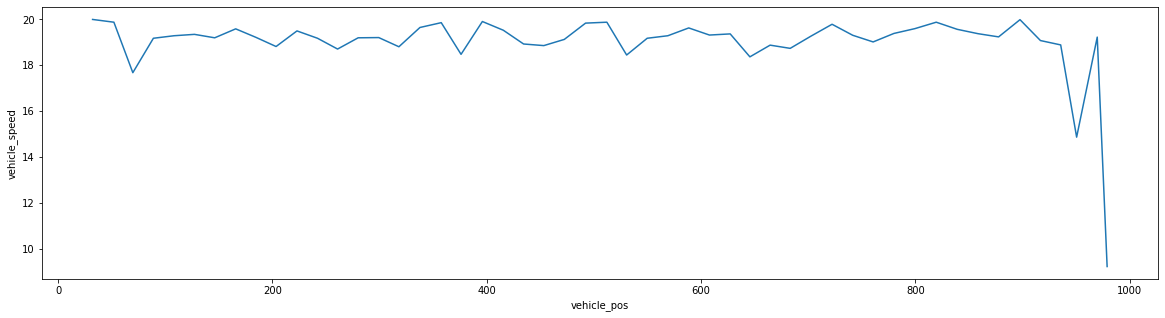

In [12]:
plt.figure(figsize=(20,5))
# plot posisi - speed
sns.lineplot(sampel.vehicle_pos, sampel.vehicle_speed);

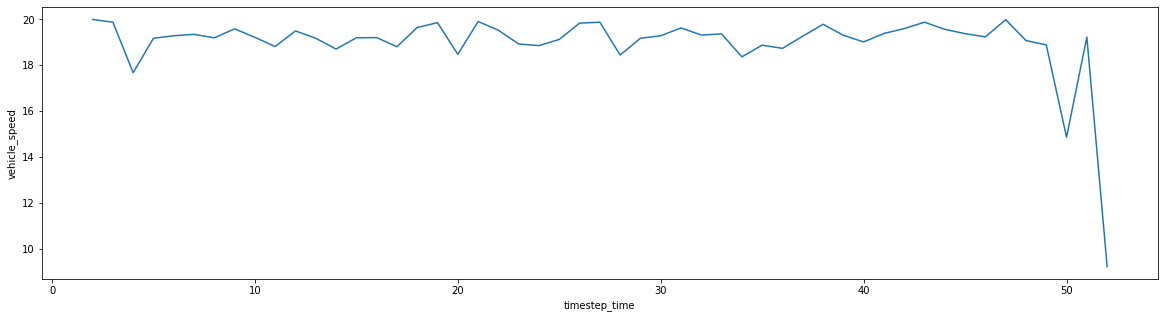

In [13]:
plt.figure(figsize=(20,5))
#plot time - speed
sns.lineplot(sampel.timestep_time, sampel.vehicle_speed);

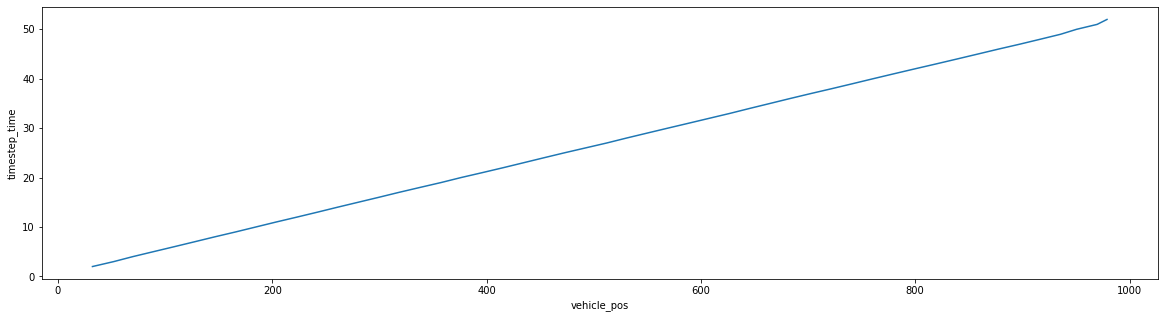

In [14]:
#plot time - speed
plt.figure(figsize=(20,5))
sns.lineplot(sampel.vehicle_pos, sampel.timestep_time);

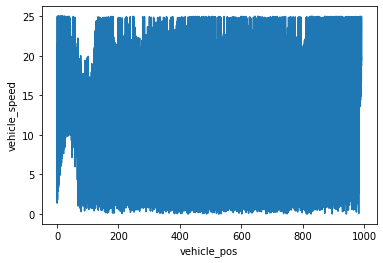

In [15]:
sns.lineplot("vehicle_pos", "vehicle_speed", data=data, ci=None);

welp, ternyata keos juga. Sebagai pelengkap, coba kita ambil beberapa sampel kendaraan lain.

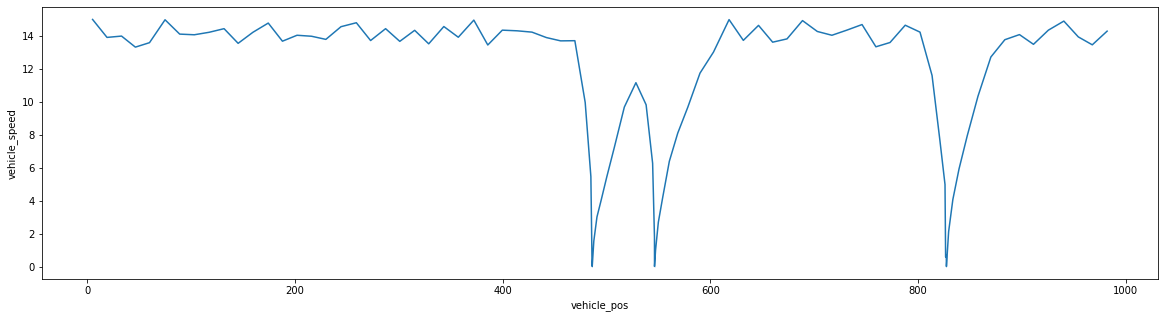

In [16]:
# Angkot ke-10
sampel = data[data.vehicle_id=='fangkot.10']

plt.figure(figsize=(20,5))
sns.lineplot(sampel.vehicle_pos, sampel.vehicle_speed);

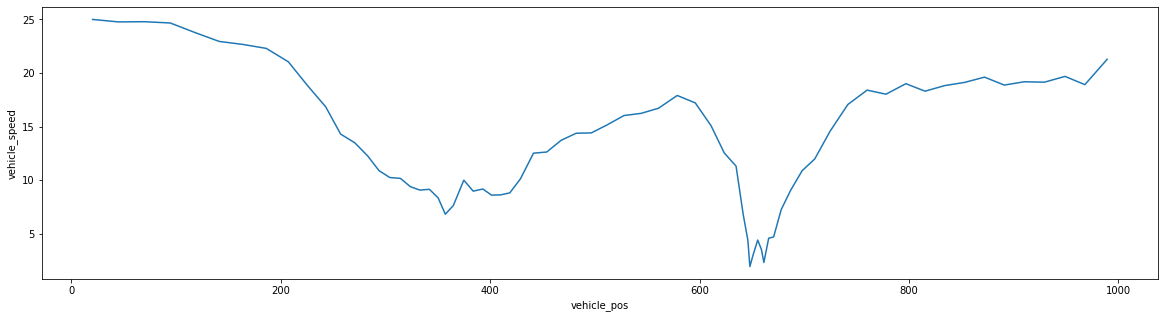

In [17]:
# Mobil ke-20
sampel = data[data.vehicle_id=='fmobil2.20']

plt.figure(figsize=(20,5))
sns.lineplot(sampel.vehicle_pos, sampel.vehicle_speed);

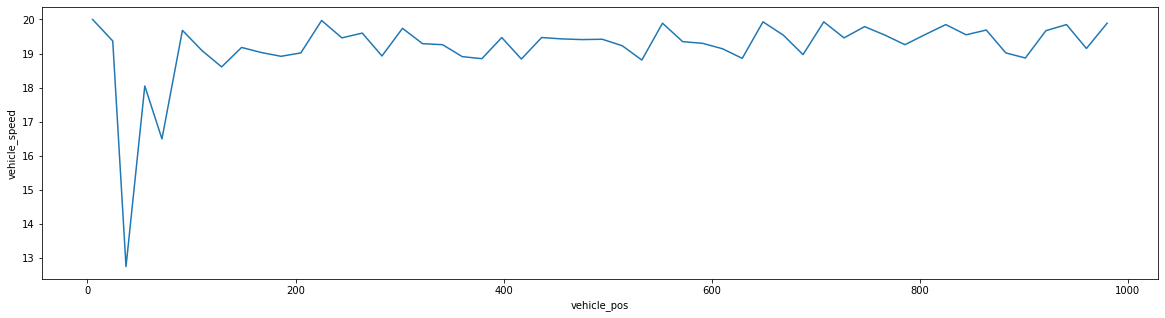

In [18]:
# Motor ke-100
sampel = data[data.vehicle_id=='fmotor.100']

plt.figure(figsize=(20,5))
sns.lineplot(sampel.vehicle_pos, sampel.vehicle_speed);

## Pertimbangan Bumbu

Dalam membuat model untuk mengkategorikan kondisi jalan raya dari data ini, ada beberapa hal yang perlu diperhatikan:
- tidak semua kendaraan memiliki jumlah `timestep_time` yang sama, bahkan untuk jenis kendaraan yg sama.
- semua kendaraan hampir pasti memiliki data `vehicle_pos` yang unik.
- Ada dua arus lalu lintas berbeda dalam model ini, yakni arus yang bergerak dari utara ke selatan, dan sebaliknya.
- Well, sepertinya data ini mencangkup kondisi jalan dalam lancar, padat namun lancar, dan macet.

## Ucijoba Memanggang #1

In [19]:
# fokus kepada data kendaraan dari selatan ke utara
pata = data[~data.vehicle_id.str.contains('-')]

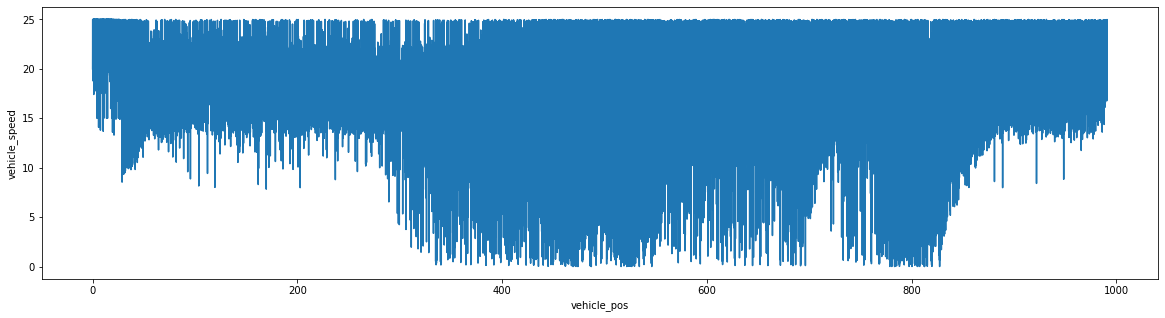

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot("vehicle_pos", "vehicle_speed", data=pata, ci=None);

Disini, saya akan tutup mata, mengasumsikan data `vehicle_pos` setiap kendaraan sama. Tentu, ini melanggar kenyataan pada bagian Pertimbangan Bumbu. Namun, dengan *blissful thinking* bahwa selisih setiap `vehicle_pos` tidak jauh, saya bisa berfokus hanya pada data `vehicle_speed`. Mari lihat berapa banyak kendaraan dalam dataset ini

In [21]:
len(set(pata.vehicle_id))

2501

In [22]:
vector = {}

for vehicle in tqdm(set(pata.vehicle_id)):
    # ya, urang tau kode dibawah ini ngga elegan
    vector[vehicle] = list(pata[pata.vehicle_id==vehicle].vehicle_speed)

100%|██████████| 2501/2501 [01:35<00:00, 26.25it/s]


In [23]:
len_vector = {}

for k, v in vector.items():
    if len(v) not in len_vector:
        len_vector[len(v)] = 1
    else: len_vector[len(v)] += 1

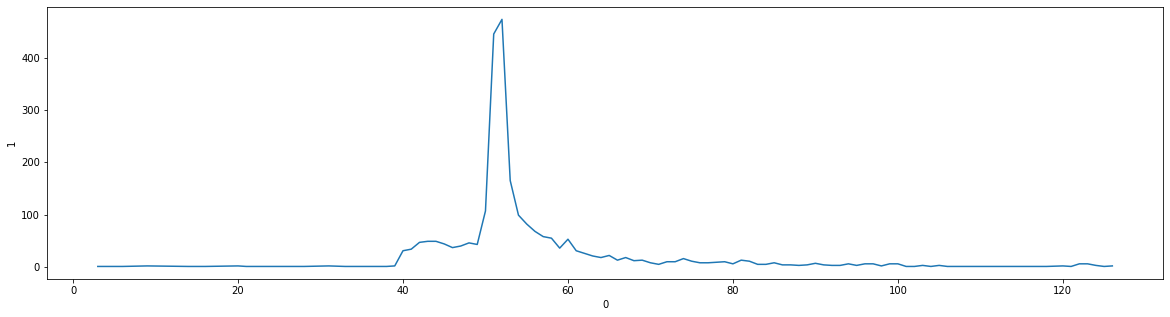

In [24]:
a = pd.DataFrame(sorted(len_vector.items()))
plt.figure(figsize=(20,5))
sns.lineplot(a[0], a[1])

Wah keos juga. Sumbu $x$ menyatakan panjang vektor, sedangkan sumbu $y$ menyatakan jumlah kendaraan yang memiliki panjang vektor tersebut. Tentu, kita dapat mengubah (*most of elements in*) `vektor` agar memiliki panjang yang sama dengan mengagregatkan data maupun *[binning](https://en.wikipedia.org/wiki/Data_binning)*. tapi urang penasaran dengan vektor yang panjangnya 52.

In [25]:
vectora = {k:v for k,v in vector.items() if len(v)==52}

vecca = []
for vehicle, rows in vectora.items():
    for pos in range(52):
        vecca.append((vehicle, pos, rows[pos]))

veca = pd.DataFrame(vecca)

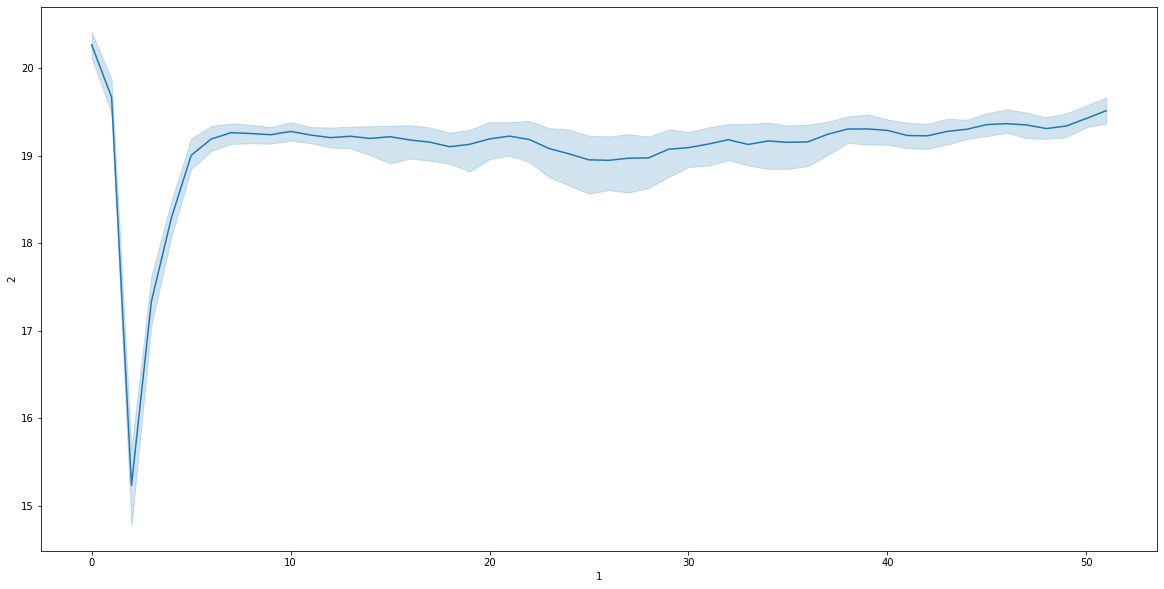

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(veca[1], veca[2], ci=100);

well, 473 data kendaraan (dengan panjang vektornya 52) punya pola yang mirip ya :/

### Sekali Lagi

In [28]:
vectora = {k:v for k,v in vector.items() if len(v)==50}
print(len(vectora))

vecca = []
for vehicle, rows in vectora.items():
    for pos in range(50):
        vecca.append((vehicle, pos, rows[pos]))

veca = pd.DataFrame(vecca)

107


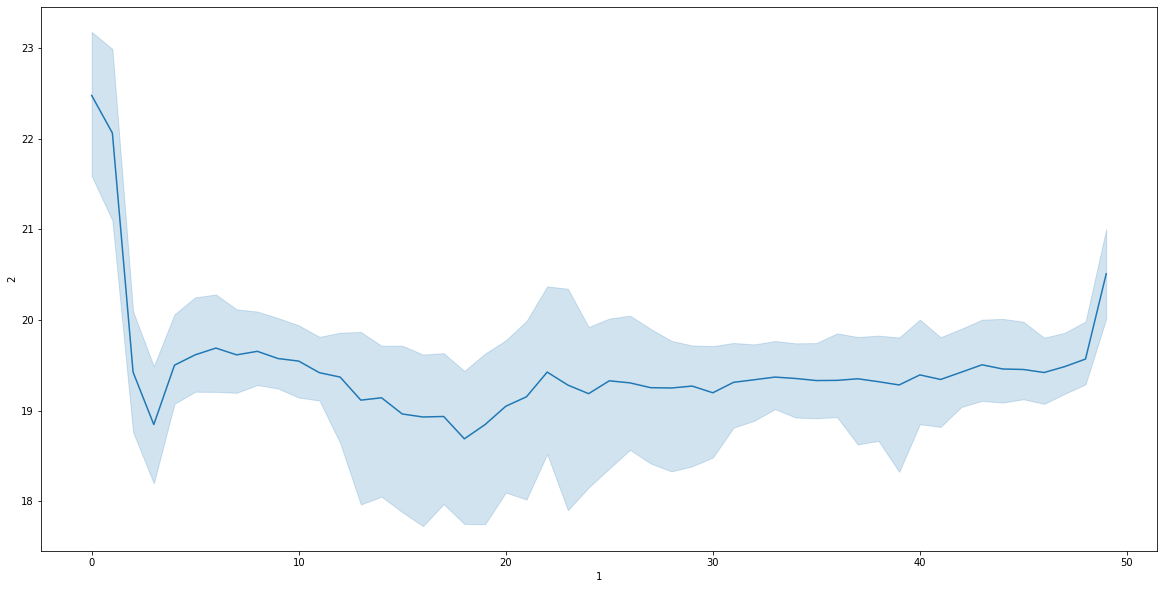

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(veca[1], veca[2], ci=100);

hm, jalannya lancar juga ya :/

### Sekali Lagi

In [30]:
vectora = {k:v for k,v in vector.items() if len(v)==65}
print(len(vectora))

vecca = []
for vehicle, rows in vectora.items():
    for pos in range(65):
        vecca.append((vehicle, pos, rows[pos]))

veca = pd.DataFrame(vecca)

22


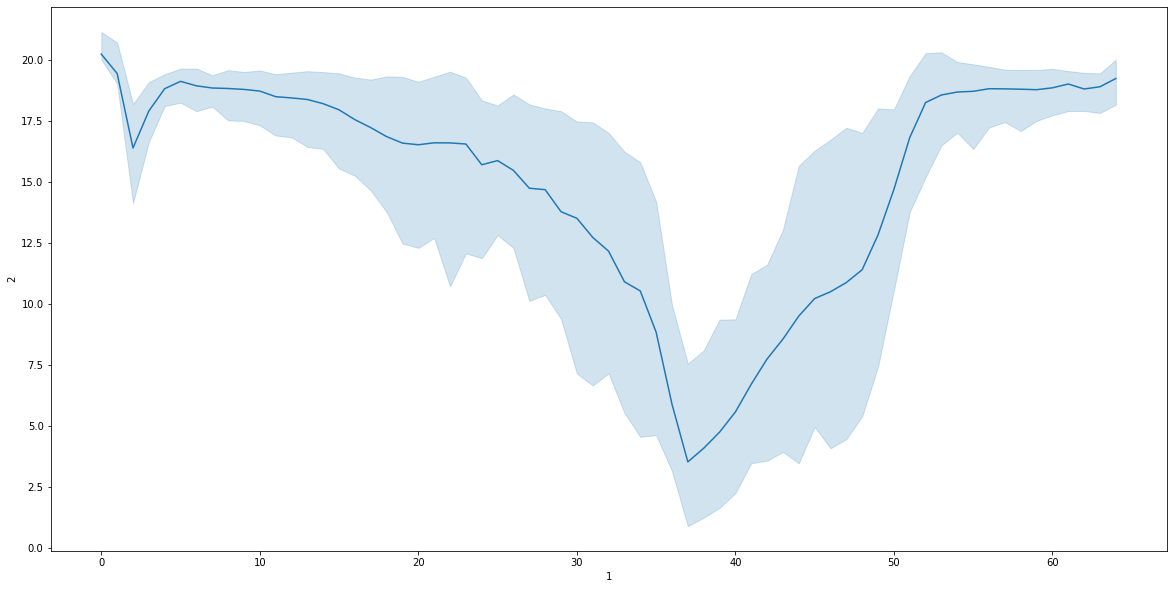

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(veca[1], veca[2], ci=100);

welp ada perlambatan-yang-signifikan disana. Sepertinya panjang vektor `vehicle_speed` memberikan informasi mengenai "pola" kemacetan. Sayang, ada *caveat* dalam ujicoba ini :/

## Uhcijohba Meganmmanm #2

Daripada menganalisis dari panjang vektor, bagaimana kalau menganalisis dengan membagi berdasarkan interval?

*urang nulis ini jam 1:15AM, baru sadar ide ini lebih waras, mungkin*

In [32]:
def plot_at_interval(a, b):
    # ya, urang tau kode ini tidak cantik
    intervaled = pata[a < pata.timestep_time]
    intervaled = intervaled[intervaled.timestep_time < b]

    plt.figure(figsize=(20,10))
    sns.lineplot(intervaled.vehicle_pos, intervaled.vehicle_speed, ci=None);

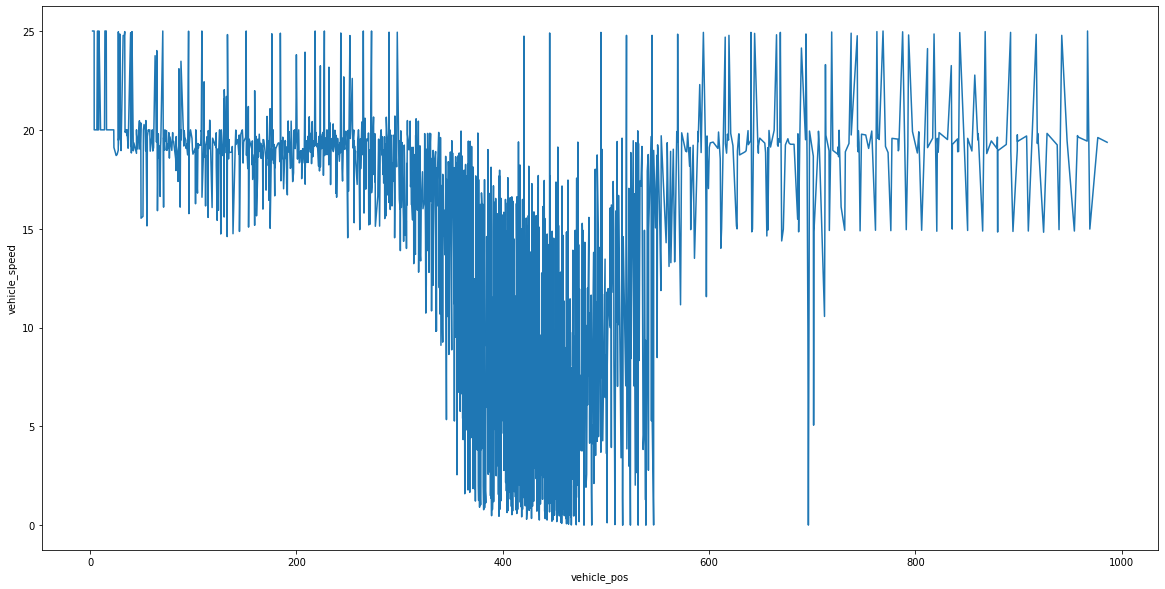

In [33]:
plot_at_interval(0, 40)

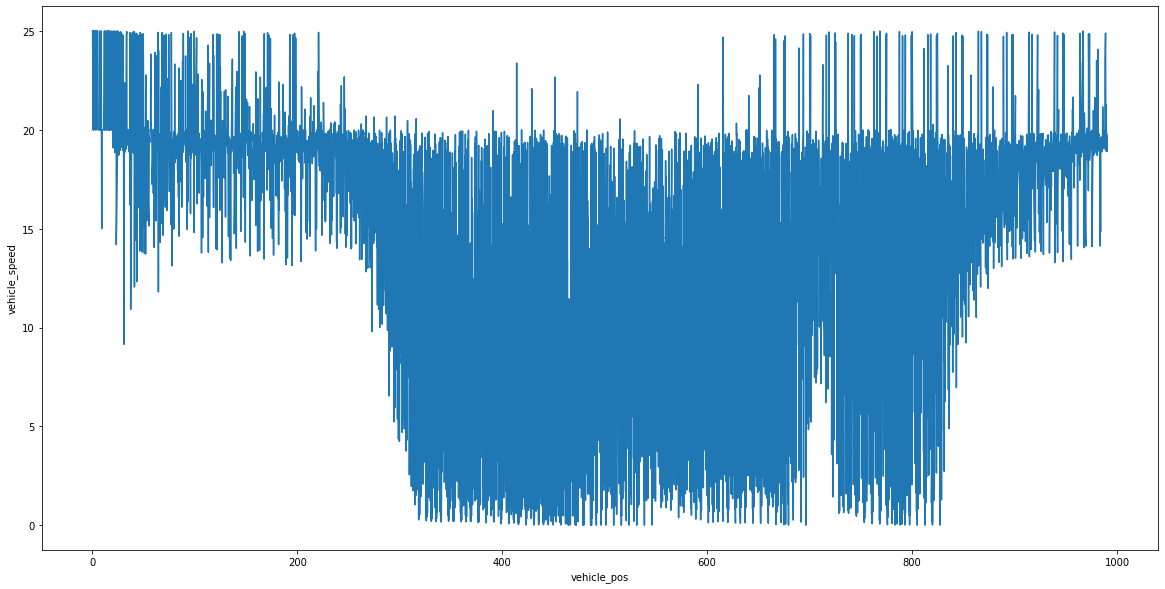

In [34]:
plot_at_interval(10, 140)

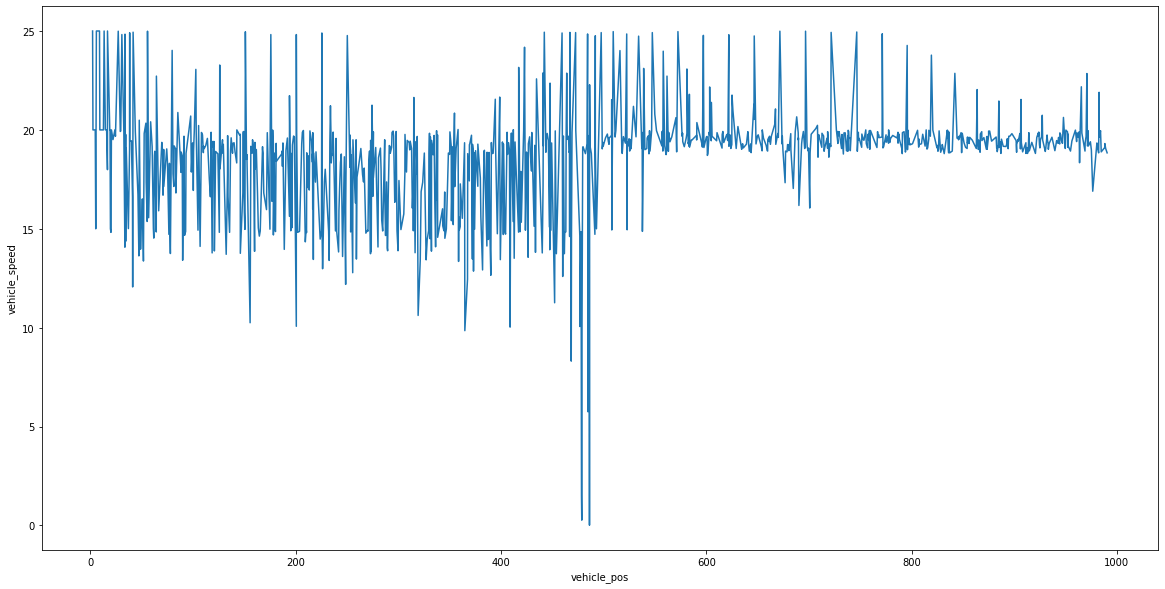

In [35]:
plot_at_interval(1000, 1040)

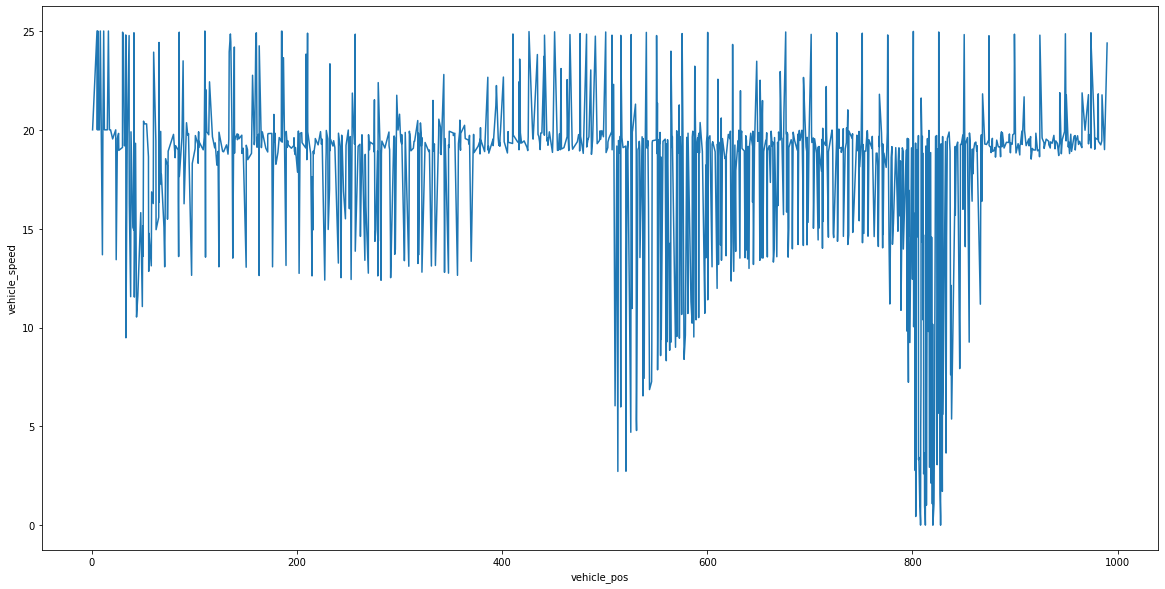

In [36]:
plot_at_interval(2000, 2040)